In [4]:
import tensorflow as tf
tf.__version__

'2.20.0'

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [6]:
classifier = Sequential()

In [7]:
classifier.add(Conv2D(32,(3,3), input_shape=(64,64,3),activation = 'relu'))

C:\Users\HP\anaconda3\envs\tf_cpu\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
classifier.add(MaxPooling2D(pool_size=(2,2)))

In [9]:
classifier.add(Conv2D(32,(3,3),activation = 'relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))

In [10]:
classifier.add(Flatten())

In [11]:
classifier.add(Dense(units= 128, activation = 'relu'))
classifier.add(Dense(units=1, activation = 'sigmoid'))

In [12]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [13]:
classifier.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         802,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 813,217 (3.10 MB)

 Trainable params: 813,217 (3.10 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [15]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [16]:
train_set = train_datagen.flow_from_directory(
        'dataset/training_set',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')
test_set = test_datagen.flow_from_directory(
        'dataset/test_set',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [17]:
history = classifier.fit(train_set, epochs=25,validation_data=test_set)

C:\Users\HP\anaconda3\envs\tf_cpu\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 74s 288ms/step - accuracy: 0.5875 - loss: 0.6693 - val_accuracy: 0.6475 - val_loss: 0.6349
Epoch 2/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 68s 231ms/step - accuracy: 0.6699 - loss: 0.6058 - val_accuracy: 0.6920 - val_loss: 0.5862
Epoch 3/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 66s 168ms/step - accuracy: 0.6969 - loss: 0.5733 - val_accuracy: 0.7280 - val_loss: 0.5461
Epoch 4/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 43s 170ms/step - accuracy: 0.7283 - loss: 0.5309 - val_accuracy: 0.7160 - val_loss: 0.5424
Epoch 5/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 35s 141ms/step - accuracy: 0.7521 - loss: 0.5065 - val_accuracy: 0.7650 - val_loss: 0.4823
Epoch 6/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 34s 136ms/step - accuracy: 0.7653 - loss: 0.4867 - val_accuracy: 0.7465 - val_loss: 0.5238
Epoch 7/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 45s 181ms/step - accuracy: 0.7761 - loss: 0.4704 - val_accuracy: 0.7700 - val_loss: 0.4756
Epoch 8/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 49s 196ms/step - accuracy: 0.7900 - loss: 0

In [18]:
import matplotlib.pyplot as plt

In [19]:
training_loss = history.history['loss']
test_loss = history.history['val_loss']

In [20]:
epoch_count = range(1, len(training_loss)+1)

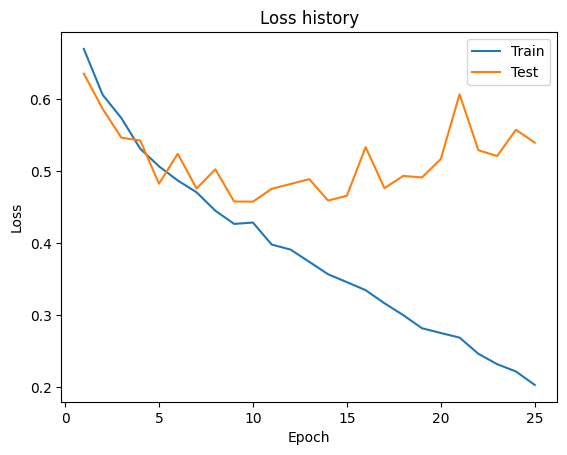

In [21]:
plt.plot(epoch_count, training_loss)
plt.plot(epoch_count, test_loss)
plt.title('Loss history')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'])

In [22]:
training_acc = history.history['accuracy']
test_acc = history.history['val_accuracy']

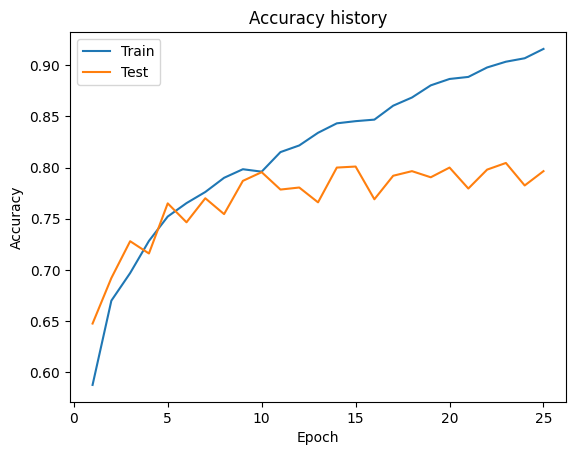

In [23]:
plt.plot(epoch_count, training_acc)
plt.plot(epoch_count, test_acc)
plt.title('Accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'])

In [24]:
import numpy as np
#from keras.preprocessing import image
from keras.utils import load_img, img_to_array
test_image = load_img('dataset/single_prediction/cat_or_dog_2.jpg', 
                      target_size=(64,64))

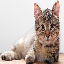

In [25]:
test_image

In [26]:
test_image = img_to_array(test_image)
test_image /= 255

In [27]:
test_image.shape

(64, 64, 3)

In [28]:
test_image

array([[[0.9372549 , 0.9372549 , 0.9372549 ],
        [0.9372549 , 0.9372549 , 0.9372549 ],
        [0.9372549 , 0.9372549 , 0.9372549 ],
        ...,
        [0.9607843 , 0.9607843 , 0.9607843 ],
        [0.9607843 , 0.9607843 , 0.9607843 ],
        [0.9607843 , 0.9607843 , 0.9607843 ]],

       [[0.9372549 , 0.9372549 , 0.9372549 ],
        [0.9372549 , 0.9372549 , 0.9372549 ],
        [0.9372549 , 0.9372549 , 0.9372549 ],
        ...,
        [0.9607843 , 0.9607843 , 0.9607843 ],
        [0.9607843 , 0.9607843 , 0.9607843 ],
        [0.95686275, 0.95686275, 0.95686275]],

       [[0.9372549 , 0.9372549 , 0.9372549 ],
        [0.9372549 , 0.9372549 , 0.9372549 ],
        [0.9372549 , 0.9372549 , 0.9372549 ],
        ...,
        [0.95686275, 0.95686275, 0.95686275],
        [0.95686275, 0.95686275, 0.95686275],
        [0.95686275, 0.95686275, 0.95686275]],

       ...,

       [[0.94509804, 0.8509804 , 0.8039216 ],
        [0.9529412 , 0.8627451 , 0.80784315],
        [0.9490196 , 0

In [29]:
test_image = np.expand_dims(test_image,axis=0)
test_image.shape

(1, 64, 64, 3)

In [30]:
result = classifier.predict(test_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step


In [31]:
result

array([[0.2950378]], dtype=float32)

In [32]:
result = result[0][0]>0.5

In [33]:
if result == True:
    prediction = 'dog'
else:
    prediction = 'cat'

print(prediction)

cat


In [34]:

from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D

# input layer
visible = Input(shape=(64,64,3))
# feature extractor
conv1 = Conv2D(32, kernel_size=4, activation='relu')(visible)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
conv2 = Conv2D(32, kernel_size=4, activation='relu')(pool1)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
flat = Flatten()(pool2)
# hidden layer
hidden = Dense(10, activation='relu')(flat)
# prediction output
output = Dense(1, activation='sigmoid')(hidden)
model = Model(inputs=visible, outputs=output)

In [35]:
# summarize layers
model.summary()

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 64, 64, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 61, 61, 32)          │           1,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 27, 27, 32)          │          16,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 5408)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │          54,090 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 72,085 (281.58 KB)

 Trainable params: 72,085 (281.58 KB)

 Non-trainable params: 0 (0.00 B)

In [36]:
# Sauvegarder le modèle CNN
classifier.save('cat_dog_cnn_model.h5')
print("✅ Modèle CNN sauvegardé dans: cat_dog_cnn_model.h5")

# Vérifier que le fichier existe
import os
if os.path.exists('cat_dog_cnn_model.h5'):
    print(f"📁 Taille du fichier: {os.path.getsize('cat_dog_cnn_model.h5') / (1024*1024):.2f} MB")


✅ Modèle CNN sauvegardé dans: cat_dog_cnn_model.h5
📁 Taille du fichier: 9.34 MB
